### Decisionn Tree Regressor Model using Pipelines and Gridsearch

INTRODUCTION: This notebook is about finding the best paramater for our Decision Tree Model.We will 4 testing, 2 without pca, with broad and tuned parameters then the last 2 test with pca,  with broad and tuned parameters. 

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, r2_score




In [61]:
df_modeling = pd.read_csv(filepath_or_buffer= "../data/Dataset_for_modeling.csv") 
df_modeling

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice,Category_Arcade,Category_Books & Reference,Category_Business,...,Category_Productivity,Category_Puzzle,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel & Local,Category_other,Content_Rating_Everyone,Content_Rating_Not for Everyone
0,3.9,68.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.3,918.0,1,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,5.0,6.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,830.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9659,4.3,142.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9660,5.0,9.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9661,0.0,0.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train-Test-Split

The train test split is a machine learning practice commonly use to evaluate the performance of a model. The goal is to split the dataset into 2 part, the first part is the training then the other is the testing. The trained will be used to train the model while the test part will be used evaluate the model and see if it is predictive. The split made is 80% for the train and 20% for the test. 

In [62]:
X = df_modeling.drop(columns= 'Rating')
y = df_modeling['Rating']

In [63]:
X.shape

(9663, 29)

In [64]:
y.shape

(9663,)

In [65]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state = 1234)

### First Gridsearch (without PCA) broad parameters

In [66]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [10, 20, 30],
        'model__min_samples_split' :[2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]}]

grid_search1 = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search1.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [10, 20, 30],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10]}],
             verbose=1)

In [67]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search1.best_params_, grid_search1.best_score_))

Best parameters are {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5} with a score of 0.94


We run the model withouth the pca. We can see that the model max_depth reach the minimum range(10) (how deep the tree is) 
the model__min_samples_leaf reach the upper range(4)(minumum number of sample at the base of the tree)
the model__min_sample_split reach the middle range(5)(minimum number of samples required to split an internal node) 
We are going to rerun the model with different hyperparameters range and see if we get a better score.


In [68]:
y_pred1 = grid_search1.predict(X_test)

mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)



Mean Absolute Error (MAE): 0.28116407173442576
Coefficient of Determination (R-squared): 0.944296351983478


In [69]:
grid_search1.score(X_test, y_test)

0.944296351983478

#### Feature Importance

Feature importance is used to see what feature is important to our pedictive model

In [86]:
best_model1 = grid_search1.best_estimator_

dt_regressor1 = best_model1.named_steps['model']
feature_importances1 = dt_regressor1.feature_importances_
print("Feature Importances:", feature_importances1)

Feature Importances: [9.96574587e-01 7.18130882e-05 1.31175186e-04 4.94538369e-04
 3.41483627e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.04151685e-04 7.84991509e-05 5.01996554e-05 0.00000000e+00
 3.35610875e-04 0.00000000e+00 0.00000000e+00 5.97006633e-05
 0.00000000e+00 1.72842937e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.29699598e-04
 5.60279295e-04 0.00000000e+00 4.76382756e-04 7.29573631e-05
 1.46078945e-04]


In [160]:
df_importance1 = pd.DataFrame(list(zip(X_train, feature_importances1)), columns=['Features', 'Importance']).sort_values(by='Importance', ascending=False)

In [161]:
df_importance1

,Features,Importance
0,Rating Count,0.996575
24,Category_Tools,0.000560
3,Ad Supported,0.000495
26,Category_other,0.000476
4,In App Purchases,0.000341
12,Category_Entertainment,0.000336
8,Category_Business,0.000304
17,Category_Music & Audio,0.000173
28,Content_Rating_Not for Everyone,0.000146
2,Price,0.000131


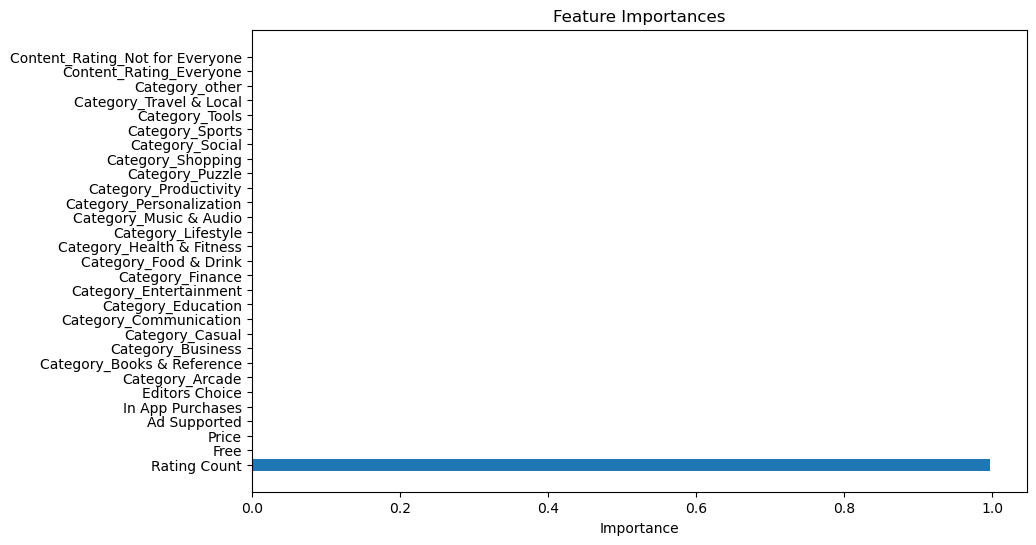

In [118]:
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances1)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

We can see the rating count is important fo our predictive mode as it has the most variance 

### Second Gridsearch (Without PCA) changed of parameters range

In [92]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [6, 8, 10, 12, 14],
        'model__min_samples_split' :[2, 4],
        'model__min_samples_leaf': [1, 2, 3]}]

grid_search2 = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search2.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [6, 8, 10, 12, 14],
                          'model__min_samples_leaf': [1, 2, 3],
                          'model__min_samples_split': [2, 4]}],
             verbose=1)

In [93]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search2.best_params_, grid_search2.best_score_))

Best parameters are {'model__max_depth': 6, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2} with a score of 0.94


We can see that the model max_depth reach the lower range(6) (how deep the tree is) 
the model__min_samples_leaf reach the upper range(3)(minumum number of sample at the base of the tree)
the model__min_sample_split reacht the lower range (2)(minimum number of samples required to split an internal node) 
We can also see that the score is the same as the previous grid search.

In [94]:
y_pred2 = grid_search2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)



Mean Absolute Error (MAE): 0.2773266190431992
Coefficient of Determination (R-squared): 0.9467366419549959


In [95]:
grid_search2.score(X_test, y_test)

0.9467366419549959

#### Feature Importance

Feature importance is used to see what feature is important to our pedictive model

In [97]:
best_model2 = grid_search2.best_estimator_

dt_regressor2 = best_model2.named_steps['model']
feature_importances2 = dt_regressor2.feature_importances_
print("Feature Importances:", feature_importances2)

Feature Importances: [9.98016290e-01 3.74412484e-05 1.53835080e-04 1.06561957e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.05865737e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.37502216e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.63436759e-04 0.00000000e+00 4.79067419e-04 0.00000000e+00
 0.00000000e+00]


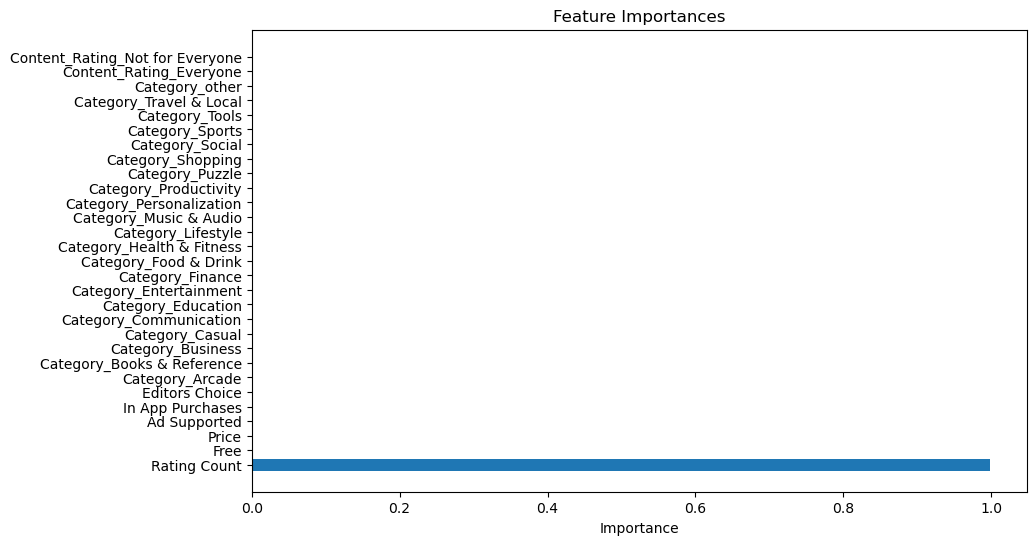

In [120]:
feature_names = X_train.columns 

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances2)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

In [162]:
df_importance2 = pd.DataFrame(list(zip(X_train, feature_importances2)), columns=['Features', 'Importance']).sort_values(by='Importance', ascending=False)

In [163]:
df_importance2

,Features,Importance
0,Rating Count,0.998016
24,Category_Tools,0.000563
26,Category_other,0.000479
12,Category_Entertainment,0.000338
8,Category_Business,0.000306
2,Price,0.000154
3,Ad Supported,0.000107
1,Free,0.000037
27,Content_Rating_Everyone,0.000000
25,Category_Travel & Local,0.000000


We can see that the rating count is important for our predictve model as it has the most variance

### Third Gridsearch (With PCA) broad parameters

In [100]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [10, 20, 30],
        'model__min_samples_split' :[2, 5, 10],
        'pca' : [PCA()],
        'pca__n_components' : [10, 20, 29],
        'model__min_samples_leaf': [1, 2, 4]}]

grid_search3 = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search3.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [10, 20, 30],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10],
                          'pca': [PCA(n_components=20)],
                          'pca__n_components': [10, 20, 29]}],
             verbose=1)

In [101]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search3.best_params_, grid_search3.best_score_))

Best parameters are {'model__max_depth': 30, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'pca': PCA(n_components=20), 'pca__n_components': 20} with a score of 0.86


We can see that the model max_depth reach the upper range (30) (how deep the tree is) 
the model__min_samples_leaf reach the top range(4)(minumum number of sample at the base of the tree)
the model__min_sample_split reacht the upper range(10)(minimum number of samples required to split an internal node).
Since we used PCA for this model, the number of n_components  reach the upper range (29).
Pca is a algorithm that find good combinations of features. 

In [102]:
y_pred3 = grid_search3.predict(X_test)

mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)


print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)



Mean Absolute Error (MAE): 0.42960032939317755
Coefficient of Determination (R-squared): 0.8408318446457123


In [103]:
grid_search3.score(X_test, y_test)

0.8408318446457123

#### Feature Importance

Feature importance is used to see what feature is important to our pedictive model

In [106]:
best_model3 = grid_search3.best_estimator_

dt_regressor3 = best_model3.named_steps['model']
feature_importances3 = dt_regressor3.feature_importances_
print("Feature Importances:", feature_importances3)

Feature Importances: [0.06373559 0.0877087  0.06973645 0.05112442 0.14735898 0.10221698
 0.00403678 0.02257159 0.02600452 0.06026519 0.05021074 0.0430485
 0.0583945  0.00904545 0.00850855 0.06022233 0.0325183  0.00383094
 0.05903441 0.04042707]


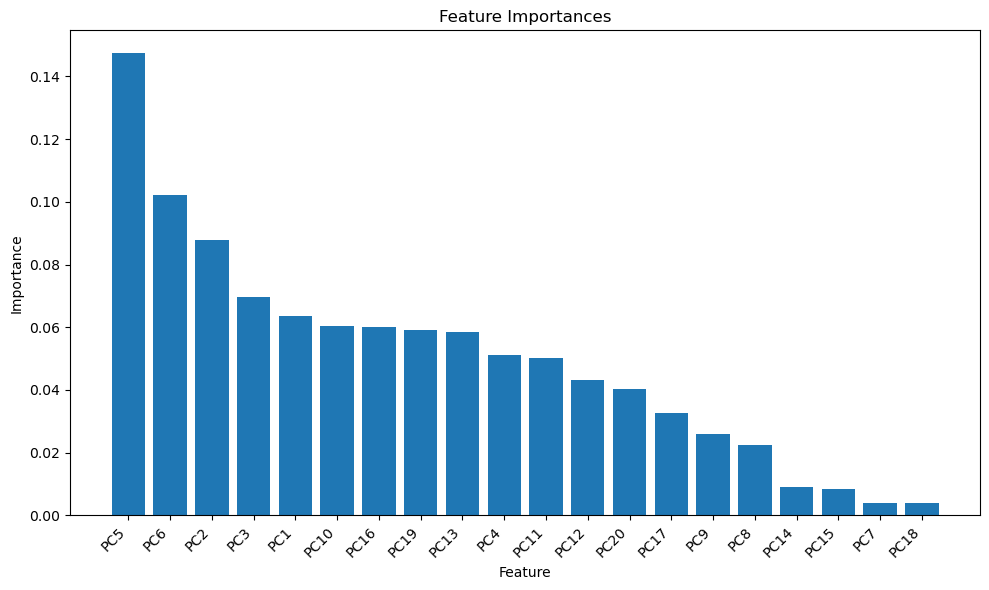

In [178]:
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances3)[::-1]

pc_feature_name = [f'PC{i}' for i in range(1, 21)]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances3)), feature_importances3[sorted_indices], align="center")
plt.xticks(range(len(feature_importances3)), np.array(pc_feature_name)[sorted_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [177]:
pc_feature_name = [f'PC{i}' for i in range(1, 21)]
np.array(pc_feature_name)[sorted_indices]


array(['PC5', 'PC6', 'PC2', 'PC3', 'PC1', 'PC10', 'PC16', 'PC19', 'PC13',
       'PC4', 'PC11', 'PC12', 'PC20', 'PC17', 'PC9', 'PC8', 'PC14',
       'PC15', 'PC7', 'PC18'], dtype='<U4')

In [181]:
df_importance3 = pd.DataFrame(list(zip(np.array(pc_feature_name)[sorted_indices], feature_importances3[sorted_indices])),
                               columns=['Features', 'Importance'])

In [182]:
df_importance3

,Features,Importance
0,PC5,0.147359
1,PC6,0.102217
2,PC2,0.087709
3,PC3,0.069736
4,PC1,0.063736
5,PC10,0.060265
6,PC16,0.060222
7,PC19,0.059034
8,PC13,0.058394
9,PC4,0.051124


We can see that the PC5 and PC6 are important for our predictve model as they have the most variance

### Fourth Gridsearch (With PCA) changed parameters

In [185]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [28, 29 ,30, 31, 32],
        'model__min_samples_split' :[3, 4, 5, 6, 7],
        'pca' : [PCA()],
        'pca__n_components' : [27, 28, 29],
        'model__min_samples_leaf': [2, 3, 4, 5, 6]}]

grid_search4 = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search4.fit(X_train, y_train)


Fitting 5 folds for each of 375 candidates, totalling 1875 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [28, 29, 30, 31, 32],
                          'model__min_samples_leaf': [2, 3, 4, 5, 6],
                          'model__min_samples_split': [3, 4, 5, 6, 7],
                          'pca': [PCA(n_components=28)],
                          'pca__n_components': [27, 28, 29]}],
             verbose=1)

In [186]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search4.best_params_, grid_search4.best_score_))

Best parameters are {'model__max_depth': 29, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5, 'pca': PCA(n_components=28), 'pca__n_components': 28} with a score of 0.87


We can see that the model max_depth reach the lower range(28) (how deep the tree is) 
the model__min_samples_leaf reach the middle range (4) (minumum number of sample at the base of the tree)
the model__min_sample_split reach 4 (minimum number of samples required to split an internal node).
Since we used PCA for this model, the number of n_components  reach the middle range (28).
We can see that the score of this model is 0.01 better than the score before. 

In [187]:
y_pred4 = grid_search4.predict(X_test)

mae = mean_absolute_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)


print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)


Mean Absolute Error (MAE): 0.4327047109468772
Coefficient of Determination (R-squared): 0.8359686110010093


In [188]:
grid_search4.score(X_test, y_test)

0.8359686110010093

#### Feature Importance

Feature importance is used to see what feature is important to our pedictive model

In [189]:
best_model4 = grid_search4.best_estimator_

dt_regressor4 = best_model4.named_steps['model']
feature_importances4 = dt_regressor4.feature_importances_
print("Feature Importances:", feature_importances4)

Feature Importances: [0.02192257 0.08664909 0.07844266 0.03857558 0.10690313 0.06542374
 0.00324577 0.04208466 0.03176691 0.04571556 0.01771103 0.05549072
 0.0578173  0.00078482 0.00508327 0.05305237 0.02206658 0.00197151
 0.02990021 0.01573276 0.03409583 0.02857169 0.03547666 0.01303339
 0.06708299 0.04139919 0.         0.        ]


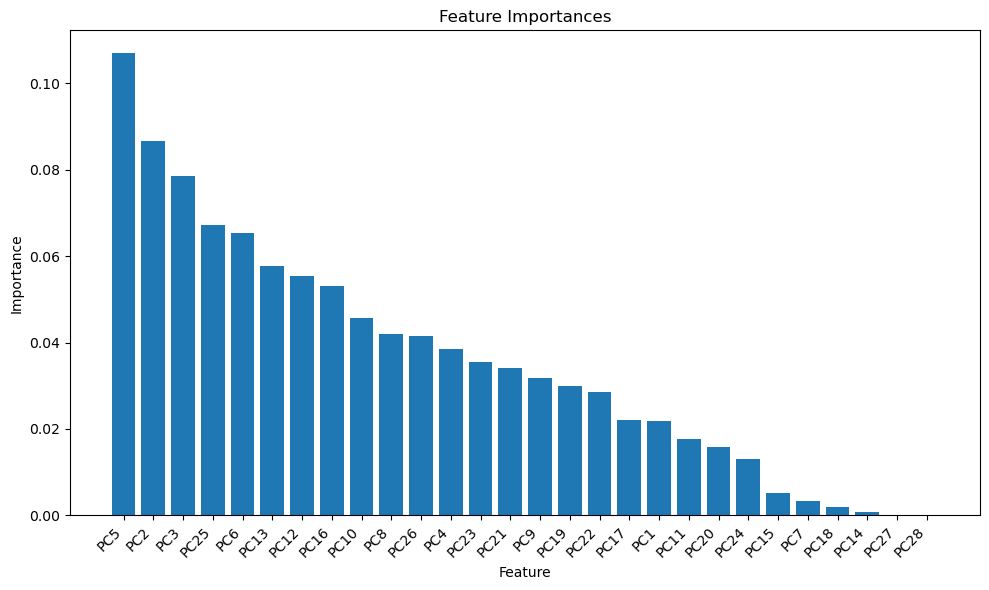

In [205]:
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances4)[::-1]


pc_feature_name2= [f'PC{i}' for i in range(1, 29)]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances4)), feature_importances4[sorted_indices], align="center")
plt.xticks(range(len(feature_importances4)), np.array(pc_feature_name2)[sorted_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [209]:
pc_feature_name2= [f'PC{i}' for i in range(1, 29)]
np.array(pc_feature_name2)[sorted_indices]

array(['PC5', 'PC2', 'PC3', 'PC25', 'PC6', 'PC13', 'PC12', 'PC16', 'PC10',
       'PC8', 'PC26', 'PC4', 'PC23', 'PC21', 'PC9', 'PC19', 'PC22',
       'PC17', 'PC1', 'PC11', 'PC20', 'PC24', 'PC15', 'PC7', 'PC18',
       'PC14', 'PC27', 'PC28'], dtype='<U4')

In [211]:
df_importance4 = pd.DataFrame(list(zip(np.array(pc_feature_name2)[sorted_indices], feature_importances4[sorted_indices])),
                               columns=['Features', 'Importance'])

In [212]:
df_importance4

,Features,Importance
0,PC5,0.106903
1,PC2,0.086649
2,PC3,0.078443
3,PC25,0.067083
4,PC6,0.065424
5,PC13,0.057817
6,PC12,0.055491
7,PC16,0.053052
8,PC10,0.045716
9,PC8,0.042085


We can see that the PC5 and PC2 are important for our predictve model as they have the most variance

### Evaluation 

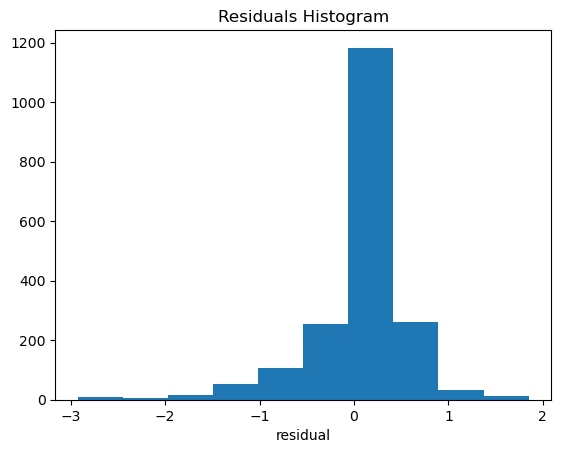

In [213]:
metrics.r2_score(y_test, y_pred1)

plt.hist([y_test-y_pred1])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()


The model with the broad parameters seems fit but it is not equaly distributed

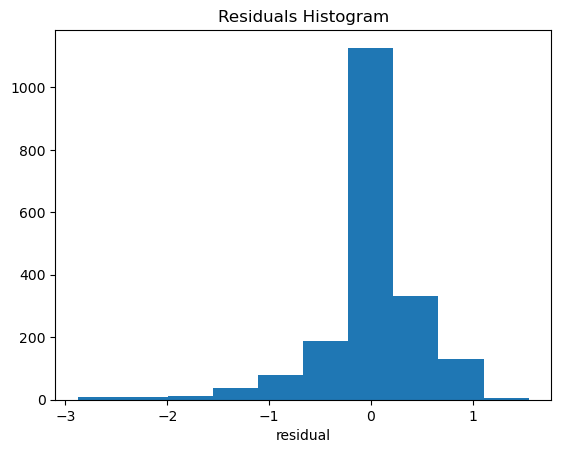

In [216]:
metrics.r2_score(y_test, y_pred2)

plt.hist([y_test-y_pred2])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()


The model with the broad parameters seems fit but it is not equaly distributed

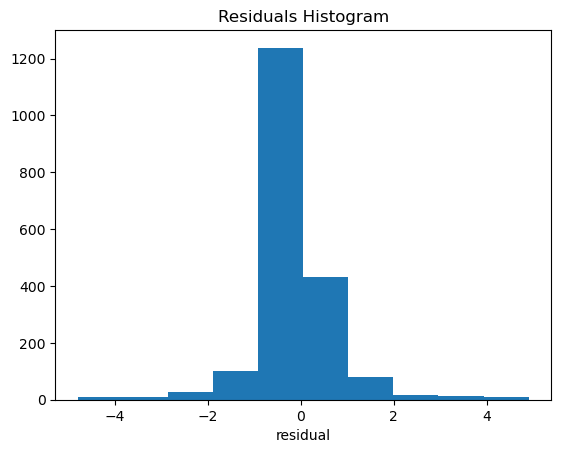

In [214]:
metrics.r2_score(y_test, y_pred3)

plt.hist([y_test-y_pred3])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()


The model with the broad parameters seems fit but it is not equaly distributed

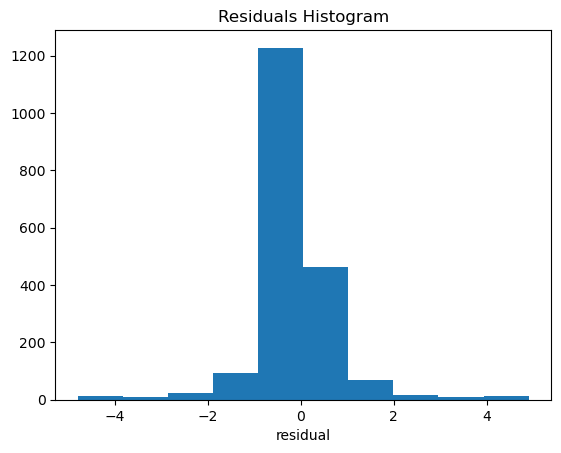

In [215]:
metrics.r2_score(y_test, y_pred4)

plt.hist([y_test-y_pred4])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()


The model with the broad parameters seems fit but it is not equaly distributed

CONCLUSION: In this notebook we saw that the Decision Tree Regressor Model  fit the dataset. For the first parameters without the pca we can see that we obtain the highest score meaning that the model is highly predictive. Then we tuned the parameters and the best parameters a bit different but the score remain the same which is 0.94.
Then we did another test with PCA using broad paramaters the same as the fist test and we have a score of 0.86 then we do another test with tuned parameters where the score is at 0.87 slight better than the other test with the broad parameters.